In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [42]:
df = pd.read_csv('./Downloads/project dataset/googleplaystore.csv')

## Data cleaning


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [44]:
#duplicate
df.duplicated().sum()


483

In [45]:
#drop duplicates   
df.drop_duplicates(inplace=True, ignore_index=True)

In [46]:
df = df[df.Category != '1.9']

In [47]:
#missing data
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

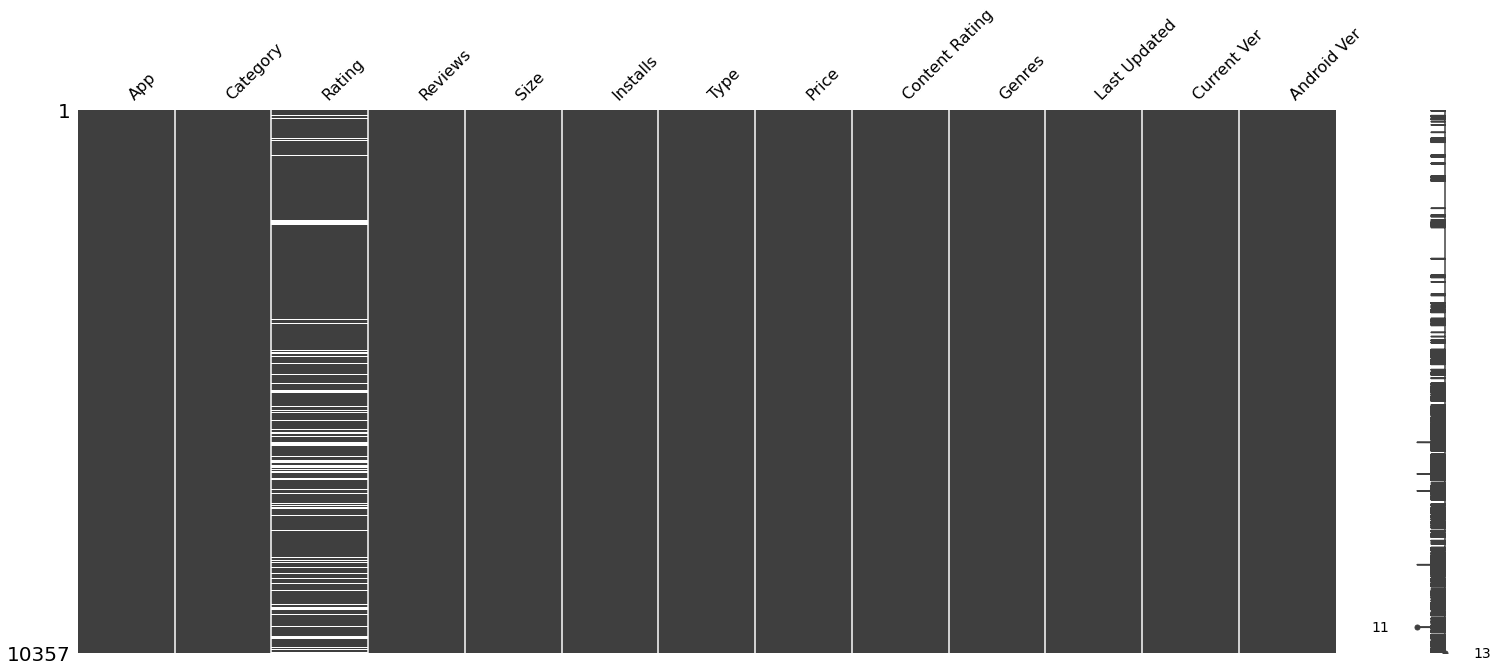

In [48]:
# Visualise the missing ones
msno.matrix(df)


In [49]:
df.dropna()

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10351                                      FR Calculator               FAMILY   
10353                                   Sya9a Maroc - FR               FAMILY   
10354                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10356                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10357      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10351     4.0       7                2.6M         500+  Free     0   
10353     4.5      38                 53M       5,000+  Free     0   
10354     5.0       4                3.6M         100+  Free     0   
10356     4.5     114  Varies with device       1,000+  Free     0   
10357     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10351       Everyone                  Education     June 18, 2017   
10353       Everyone                  Education     July 25, 2017   
10354       Everyone                  Education      July 6, 2018   
10356     Mature 17+          Books & Reference  January 19, 2015   
10357       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10351               1.0.0          4.1 and up  
10353                1.48          4.1 and up  
10354                 1.0          4.1 and up  
10356  Varies with device  Varies with device  
10357  Varies with device  Varies with device  

[8886 rows x 13 columns]

In [50]:
df["Price"]=df['Price'].str.replace('$','').astype(float)

In [51]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(float)


In [52]:
df.Rating.describe()

count    8892.000000
mean        4.187877
std         0.522377
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [53]:
df[~df.Reviews.str.isnumeric()]
df['Reviews'] = pd.to_numeric(df['Reviews'])

## EDA

In [60]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
d1=df[df['Type']=='Free']
d2=df[df['Type']=='Paid']
col='Category'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

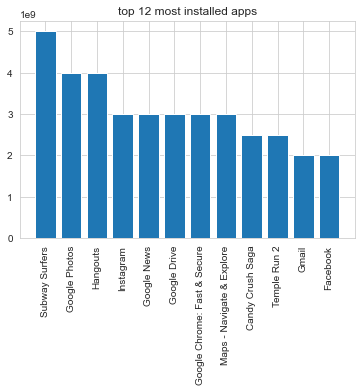

In [78]:

sns.set_style("whitegrid")
x=df.groupby("App").Installs.sum().sort_values(ascending=False).head(12)
plt.bar(range(len(x.values)), x.values)
plt.xticks(range(len(x.values)), x.index,rotation=90)
plt.title("top 12 most installed apps");


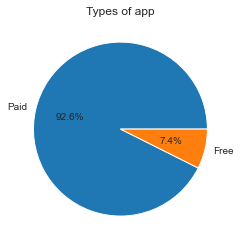

In [79]:
x=df.Type.value_counts()
label=["Paid","Free"]
plt.pie(x,labels=label,autopct="%1.1f%%")
plt.title("Types of app")
plt.show()

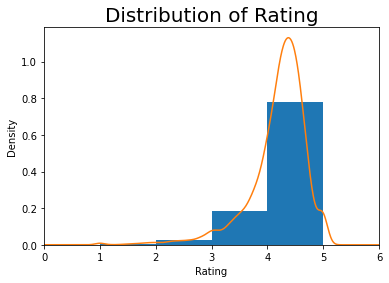

In [36]:
ax = df['Rating'].plot.hist(density=True, xlim=[0,6], bins=range(1,6))
df['Rating'].plot.density(ax=ax)
ax.set_xlabel('Rating')
plt.title('Distribution of Rating',size = 20);

## Modeling


In [14]:
df.drop_duplicates(inplace=True, ignore_index=True)
df = df[df.Category != '1.9']
df=df.dropna()

In [15]:
df2=pd.get_dummies(df.Category,prefix='Category')
df= df.drop(columns=['Size','App', 'Category','Type','Content Rating','Genres','Last Updated','Current Ver','Android Ver'])
data = df.join(df2)

In [16]:
data['rate_classify'] = pd.Series(0)
for ind in data.index:
    if data['Rating'][ind]>=4.5:
        data['rate_classify'][ind]=1
    elif data['Rating'][ind]<4.5:
        data['rate_classify'][ind]=0
        
y = data.Rating
X=data.drop(['Rating','rate_classify'],axis=1)

<ipython-input-16-9e5b5fe06ab0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate_classify'][ind]=0
<ipython-input-16-9e5b5fe06ab0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rate_classify'][ind]=1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

In [18]:
# random forest regressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
pd.DataFrame(X_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf).round(3)
print("RMSE using Random Forest: ", mse_rf)
feature_names=X.columns

RMSE using Random Forest:  0.27


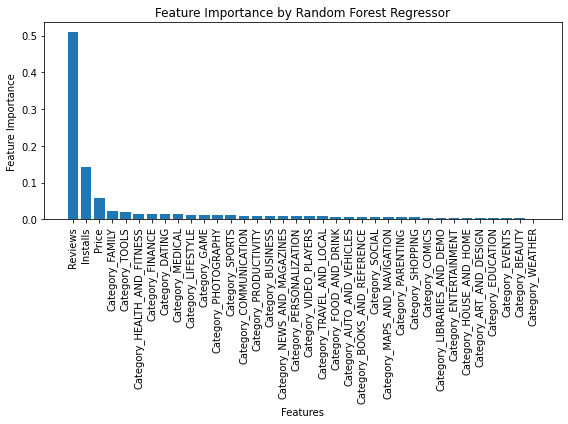

In [22]:
indices = np.argsort(rf.feature_importances_)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
plt.figure(figsize=(8, 6))
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_[indices])
plt.xticks(range(len(rf.feature_importances_)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance by Random Forest Regressor')
plt.tight_layout()
plt.show()




In [23]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import math

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

lr=LinearRegression()
lr.fit(X_train,y_train) 
lr
y_pred_lr = rf.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr).round(3)
print(mse_lr)

X_train_lr = sm.add_constant(X_train)

#fit linear regression model
model_lr = sm.OLS(y_train, X_train_lr).fit()

#view model summary
print(model_lr.summary())

0.27
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     6.770
Date:                Tue, 27 Jun 2023   Prob (F-statistic):           3.28e-31
Time:                        17:16:18   Log-Likelihood:                -5345.3
No. Observations:                7108   AIC:                         1.076e+04
Df Residuals:                    7072   BIC:                         1.101e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0686      0.009    463.957    

In [24]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet

alpha = 0.5 # Regularization parameter
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
elasticNet = ElasticNet(alpha=alpha)
elasticNet.fit(X_train, y_train)

# Predict on the test data and calculate the R-squared score
y_pred_rid = ridge.predict(X_test)
mse_rid = mean_squared_error(y_test, y_pred_rid).round(3)
y_pred_las = lasso.predict(X_test)
mse_las = mean_squared_error(y_test, y_pred_las).round(3)
y_pred_ela = ridge.predict(X_test)
mse_ela = mean_squared_error(y_test, y_pred_ela).round(3)
print('mean_squared_error score for Ridge:', mse_rid)
print('mean_squared_error score for Lasso:', mse_las)
print('mean_squared_error score for Elastic Net:', mse_ela)


mean_squared_error score for Ridge: 0.266
mean_squared_error score for Lasso: 0.275
mean_squared_error score for Elastic Net: 0.266


In [27]:
#logistic regression
from  sklearn.linear_model import LogisticRegression
y_c=data['rate_classify'].values
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_c, stratify=y_c, test_size = 0.2, random_state = 42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_c, y_train_c)
y_pred_c_log = logistic_regression.predict(X_test_c)
mse_c_log = mean_squared_error(y_test_c, y_pred_c_log).round(3)
mse_c_log
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(y_test_c, y_pred_c_log)
logit_accuracy

0.718785151856018

In [28]:
import statsmodels.api as sms
logit_model=sms.Logit(y_train_c,X_train_c).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.605475
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 7108
Model:                          Logit   Df Residuals:                     7072
Method:                           MLE   Df Model:                           35
Date:                Tue, 27 Jun 2023   Pseudo R-squ.:                 0.03022
Time:                        17:22:07   Log-Likelihood:                -4303.7
converged:                       True   LL-Null:                       -4437.8
Covariance Type:            nonrobust   LLR p-value:                 9.446e-38
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Reviews                       9.914e-08   1.97e-08      5.029      0.000    6.05e-08    1.38e-07
Installs                      -1.93e-09   5.89e-10     -3.277      0.001   -3.08e-09   -7.76e-10
Price                           -0.0059      0.004     -1.632      0.103      -0.013       0.001
Category_ART_AND_DESIGN         -0.1479      0.273     -0.542      0.588      -0.683       0.387
Category_AUTO_AND_VEHICLES      -0.5981      0.265     -2.253      0.024      -1.118      -0.078
Category_BEAUTY                 -0.4304      0.356     -1.208      0.227      -1.129       0.268
Category_BOOKS_AND_REFERENCE     0.0111      0.173      0.064      0.949      -0.328       0.350
Category_BUSINESS               -0.9039      0.152     -5.957      0.000      -1.201      -0.606
Category_COMICS                 -0.5047      0.283     -1.781      0.075      -1.060       0.051
Category_COMMUNICATION          -1.8812      0.191     -9.864      0.000      -2.255      -1.507
Category_DATING                 -1.7832      0.248     -7.191      0.000      -2.269      -1.297
Category_EDUCATION              -0.4978      0.198     -2.510      0.012      -0.887      -0.109
Category_ENTERTAINMENT          -1.6674      0.292     -5.714      0.000      -2.239      -1.095
Category_EVENTS                 -0.1050      0.325     -0.323      0.747      -0.742       0.532
Category_FAMILY                 -0.7596      0.058    -13.083      0.000      -0.873      -0.646
Category_FINANCE                -0.7588      0.136     -5.563      0.000      -1.026      -0.491
Category_FOOD_AND_DRINK         -0.5754      0.225     -2.562      0.010      -1.016      -0.135
Category_GAME                   -0.6682      0.074     -9.075      0.000      -0.813      -0.524
Category_HEALTH_AND_FITNESS      0.1410      0.137      1.026      0.305      -0.128       0.410
Category_HOUSE_AND_HOME         -0.8051      0.292     -2.759      0.006      -1.377      -0.233
Category_LIBRARIES_AND_DEMO     -1.2124      0.343     -3.530      0.000      -1.886      -0.539
Category_LIFESTYLE              -0.6963      0.137     -5.086      0.000      -0.965      -0.428
Category_MAPS_AND_NAVIGATION    -1.3350      0.246     -5.435      0.000      -1.816      -0.854
Category_MEDICAL                -0.3676      0.129     -2.856      0.004      -0.620      -0.115
Category_NEWS_AND_MAGAZINES     -0.7308      0.164     -4.453      0.000      -1.052      -0.409
Category_PARENTING               0.0016      0.316      0.005      0.996      -0.618       0.621
Category_PERSONALIZATION        -0.4330      0.134     -3.242      0.001      -0.695      -0.171
Category_PHOTOGRAPHY            -0.9207      0.140     -6.570      0.000      -1.195      -0.646
Category_PRODUCTIVITY           -0.7712      0.134     -5.766      0.000      -1.033      -0.509
Category_SHOPPING               -0.7779      0.165     -4.707      0.000      -1.102      -0.454
Category_SOCIAL                 -0.8227 

In [29]:
#random forest Classifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
rf = RandomForestClassifier()
rf.fit(X_train_c, y_train_c)
y_pred_c_rf = rf.predict(X_test_c)
rf_accuracy = accuracy_score(y_test_c, y_pred_c_rf)
rf_mse = mean_squared_error(y_test_c, y_pred_c_rf)
rf_r2 = r2_score(y_test_c, y_pred_c_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest MSE:", rf_mse)
print("Random Forest R-Square:", rf_r2)
print("Precision: ", precision_score(y_test_c, y_pred_c_rf))
print("Recall: ", recall_score(y_test_c, y_pred_c_rf))
print("F1 score: ", f1_score(y_test_c, y_pred_c_rf))

Random Forest Accuracy: 0.7002249718785152
Random Forest MSE: 0.2997750281214848
Random Forest R-Square: -0.385397159543597
Precision:  0.5277777777777778
Recall:  0.5062166962699822
F1 score:  0.5167724388032638


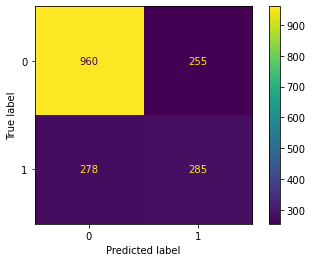

In [31]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import ConfusionMatrixDisplay
cf_rf=confusion_matrix(y_test_c, y_pred_c_rf)
ConfusionMatrixDisplay(confusion_matrix=cf_rf).plot();

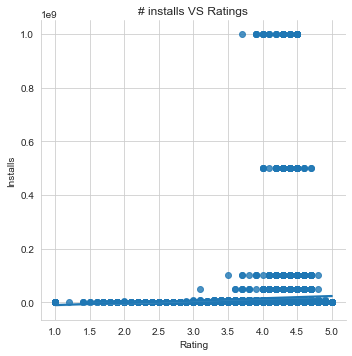

In [81]:

sns.lmplot(x="Rating",y="Installs",data=df)
plt.title("# installs VS Ratings");

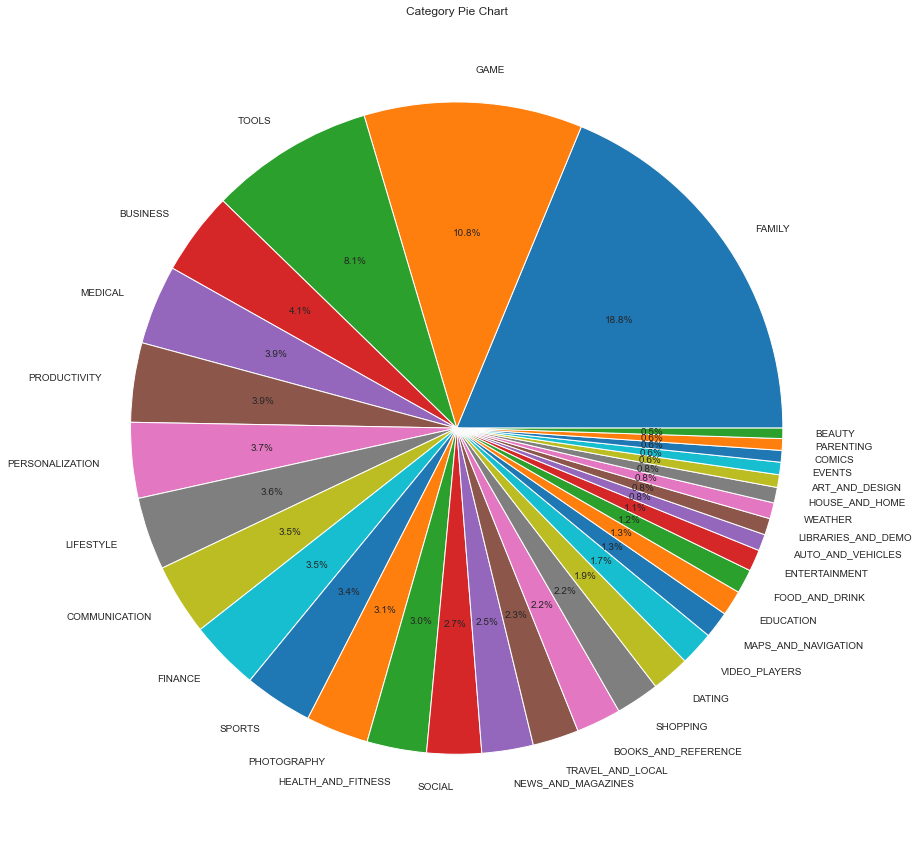

In [82]:
df.Category.unique()
x=df.Category.value_counts()
label = list(x.index)
plt.figure(figsize=(15,15))
plt.pie(x,labels=label,autopct="%1.1f%%")
plt.title("Category Pie Chart")
plt.show()

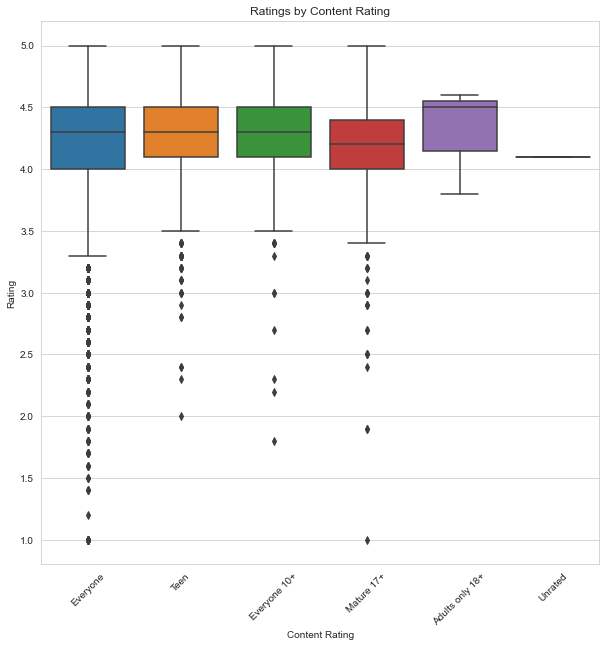

In [83]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x="Content Rating",y="Rating",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title("Ratings by Content Rating")
plt.show()

## NLP-- text analysis on Review field

In [14]:
review = pd.read_csv('./Downloads/project dataset/googleplaystore_user_reviews.csv')
review.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [15]:
review.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in review.Sentiment]
review.head(10)

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   
6  10 Best Foods for You                                            Amazing   
7  10 Best Foods for You                                                NaN   
8  10 Best Foods for You                               Looking forward app,   
9  10 Best Foods for You              It helpful site ! It help foods get !   

   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0          0                1.00                0.533333  
1          0                0.25                0.288462  
2          2                 NaN                     NaN  
3          0                0.40                0.875000  
4          0                1.00                0.300000  
5          0                1.00                0.300000  
6          0                0.60                0.900000  
7          2                 NaN                     NaN  
8          2                0.00                0.000000  
9          2                0.00                0.000000

In [16]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
review = review.dropna(subset=['Translated_Review'])


In [18]:
#removing stopwords, unnecessary characters, lemmatization,
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk as nlp


text_list=[]
for i in review.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",str(i))
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)
text_list[:10]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given']

In [19]:
#bag of words
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
max_features=200000

cou_vec=CountVectorizer(max_features=max_features,stop_words="english")
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names_out()


In [20]:
#wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_freq = {}
word_list = [word for line in text_list for word in line.split()]
word_list = [word for word in word_list if len(word) >= 2]
stop_words = set(stopwords.words('english'))
word_list = [word for word in word_list if not word.lower() in stop_words]
for word in word_list:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


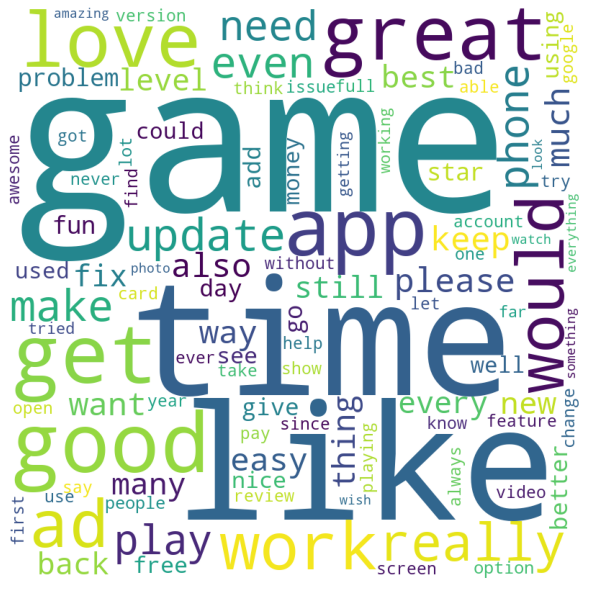

In [21]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100).generate_from_frequencies(word_freq)

# plot the WordCloud object 
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [22]:
from collections import Counter
words_counts = Counter(word_list)
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_wordList = []
most_common_CountList = []
for x, y in most_common_words:
    most_common_wordList.append(x)
    most_common_CountList.append(y)


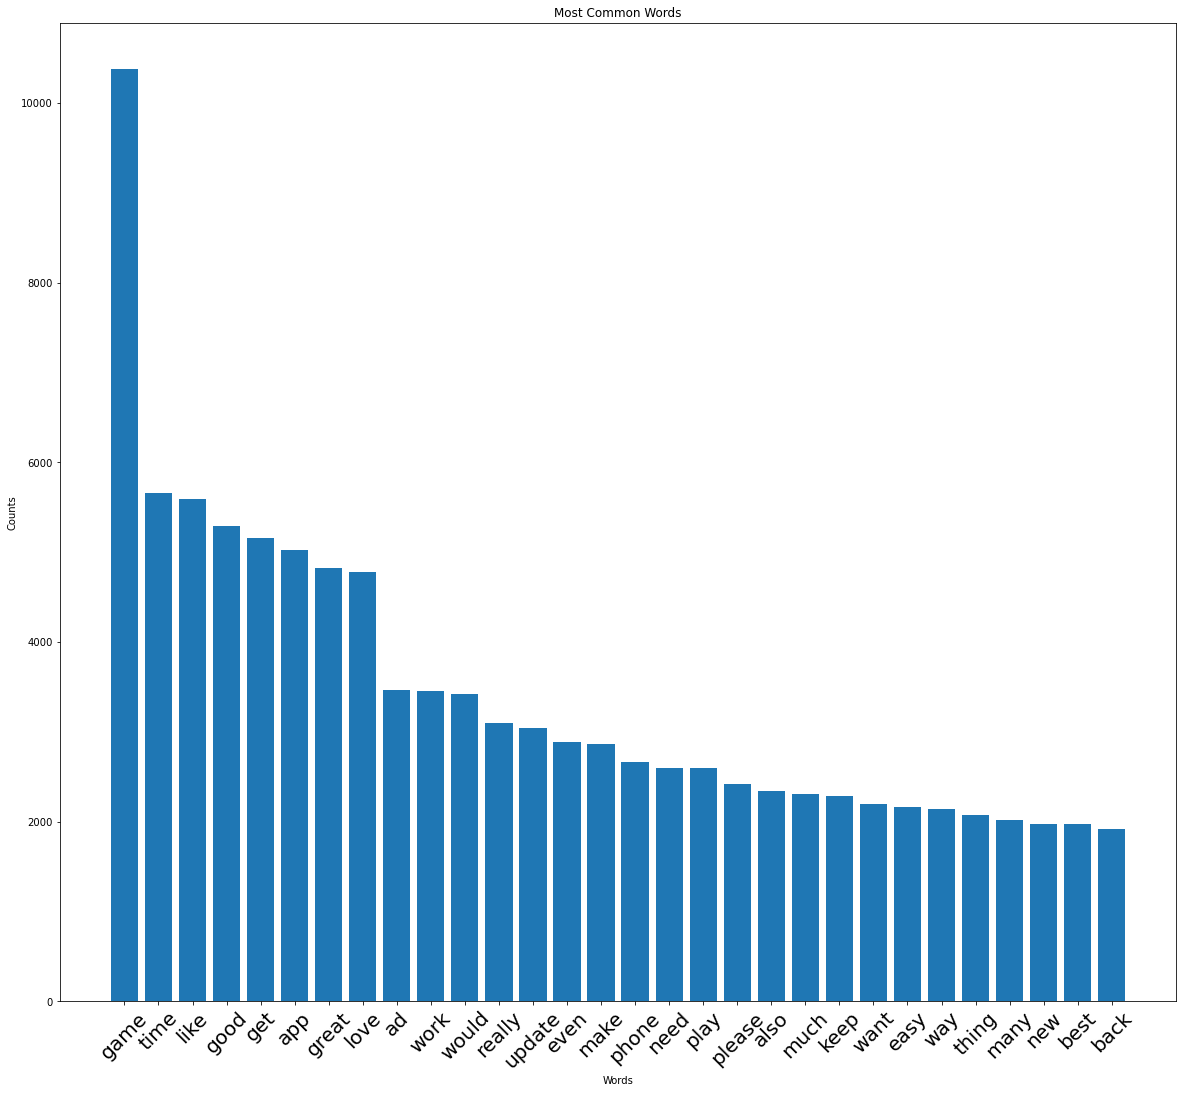

In [23]:
plt.figure(figsize=(20,18))
plt.bar(most_common_wordList[0:30], most_common_CountList[0:30])
# add labels and title to the plot
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Most Common Words')
plt.xticks(fontsize=20,rotation=45)
# show the plot
plt.show()

## Sentiment analysis modeling


In [24]:
x=sparce_matrix
y=review.Sentiment.values

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [26]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10)
random.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [27]:
print("Accuracy: ",random.score(x_test,y_test))
y_pred = random.predict(x_test)
y_true = y_test

Accuracy:  0.8847181405289875


[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative'), Text(0, 2.5, 'Neutral')]

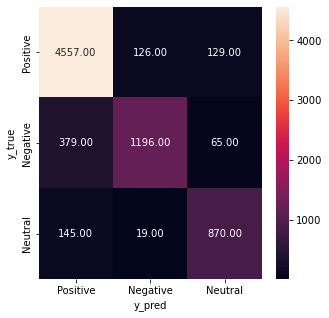

In [28]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
names = ['Positive', 'Negative', 'Neutral']
cm = confusion_matrix(y_true, y_pred)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = '0.2f')
plt.xlabel('y_pred')
plt.ylabel('y_true')
ax.set_xticklabels(names)
ax.set_yticklabels(names)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4812
           1       0.89      0.73      0.80      1640
           2       0.82      0.84      0.83      1034

    accuracy                           0.88      7486
   macro avg       0.87      0.84      0.85      7486
weighted avg       0.88      0.88      0.88      7486



In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
lr_model.score(x_train,y_train)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9680705387261614

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4812
           1       0.88      0.86      0.87      1640
           2       0.82      0.90      0.86      1034

    accuracy                           0.92      7486
   macro avg       0.88      0.90      0.89      7486
weighted avg       0.92      0.92      0.92      7486



([<matplotlib.axis.YTick at 0x7f89b8903f10>,
 [Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Neutral'), Text(0, 2.5, 'Positive')])

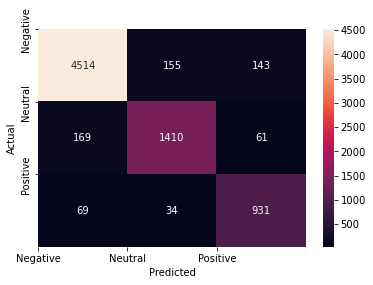

In [31]:
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test,lr_pred))

sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt = '.5g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])
plt.yticks(ticks = [0,1,2],labels = ['Negative','Neutral','Positive'])